In [153]:
import random
from matplotlib import pyplot as plt
from math import atan, pi, radians

In [154]:
class Point:
    def __init__(self, num_points):
        self.xpoint = self.get_random(num_points)
        self.ypoint = self.get_random(num_points)

    def get_random(self, num_points):
        return random.randrange(1, num_points * 100)
        # The options to pick from will be 100 times the number of points
        # This is only here to minimize the probably of ending up with collinear points
        # This is important for our assumtption -> No three points are collinear

In [155]:
def generatePoints(n):
    points = [Point(n) for x in range(n)]

    return points

In [156]:
n=23
points = generatePoints(n)

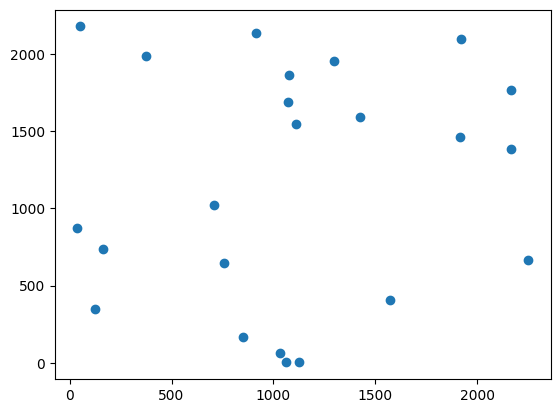

In [157]:
xpoints = [p.xpoint for p in points]
ypoints = [p.ypoint for p in points]
plt.plot(xpoints, ypoints, 'o')
# plt.axis('off')
plt.show()

In [158]:
def findReferencePoint(points):
    ref_point = None
    for p in points:
        if not ref_point:
            ref_point = p
        elif p.xpoint < ref_point.xpoint:
            ref_point = p

    return ref_point

ref_point = findReferencePoint(points)

In [159]:
points_ordered_by_angle = []

def calculateAngle(ref_point, point):
    angle = 0
    # 90 and 180 degrees means the points are collinear
    # When the points share y coordinates, we will have a division by zero problem
    # In this case, we already know the angle is 90 degrees or half of pi
    if ref_point.ypoint == point.ypoint:
        angle = pi/2
    elif ref_point.xpoint == point.xpoint:
        # When the points share x coordinates, the angle between them is 180 degrees (pi radians)
        angle = pi
    else:
        # Otherwise we calculate the angle from trig identities
        # Tan = O/A -> Tan inverse (atan) gives us the angle
        angle = atan((abs(ref_point.xpoint - point.xpoint))/(abs(ref_point.ypoint - point.ypoint)))

    # All angles should be checked counterclockwise
    if ref_point.ypoint < p.ypoint:
        # pi radians = 180 degrees
        angle = pi - angle

    return angle

for p in points:
    if ref_point != p:
        angle = calculateAngle(ref_point, p)
        points_ordered_by_angle.append({"angle": angle, "point": p})

# Sort the points by angle
points_ordered_by_angle = sorted(points_ordered_by_angle, key=lambda d: d['angle'])

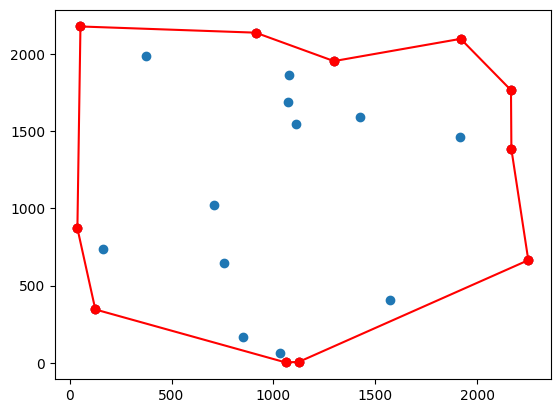

In [160]:
results = []
# Add the reference point and first point to the stack
results.append(ref_point)
results.append(points_ordered_by_angle[0]["point"])

for i in points_ordered_by_angle[1:]:
    results.append(i["point"]) # Put the current point in the stack -> It may be part of the convex hull

    # A -> Vector from 3rd last point to 2nd last point
    A = (results[-3].xpoint - results[-2].xpoint, results[-3].ypoint - results[-2].ypoint)
    # B -> Vector from 2nd last point to current point
    B = (results[-2].xpoint - results[-1].xpoint, results[-2].ypoint - results[-1].ypoint)

    # The cross product of vectors A and B (A X B) is a vector C perpendicular to both A and B
    # and with magnitude equal to the area of the parallelogram spanned by vectors A and B.
    # A positive area means the three vectors, A, B and C form a right hand system.
    # The area is given by the determinant of 
    # |  i  j  k |
    # | ax ay az |
    # | bx by bz |
    # = (aybz - byaz) + (axbz - bxaz) + (axby - bxay)
    # Since we are working with 2D, all z terms will be 0
    # => |A X B| = axby - bxay
    signed_area = A[0] * B[1] - B[0] * A[1]

    # We only keep points that make CCW turns wrt to last two points
    # The cross product is positive if the turn is CCW, negative otherwise
    if signed_area < 0:
        results.pop(-2)

plt.plot(xpoints, ypoints, 'o')

# Join the points using a line, starting with the top most 
for r in range(0, len(results)):
    p = results[r] # stack.get() if not stack.empty() else None
    q = results[r+1] if r < len(results) - 1 else results[0]

    plt.plot([p.xpoint, q.xpoint],[p.ypoint, q.ypoint],'ro-')

plt.show()